<a href="https://colab.research.google.com/github/gravity102424/ESAA/blob/main/ESAA_YB_week13_2_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 05. DBSCAN

## DBSCAN 개요

다음으로 밀도 기반 군집화의 대표적인 알고리즘인 DBSCAN(Density Based Spatial Clustering of Applications with Noise)에 대해 알아보겠다. DBSCAN은 간단하고 직관적인 알고리즘으로 돼 있음에도 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화가 가능하다. 다음과 같이 내부의 원 모양과 외부의 원 모양 형태의 분포를 가진 데이터 세트를 군집화한다고 가정할 때 앞에서 소개한 K 평균, 평균 이동, GMM으로는 효과적인 군집화를 수행하기가 어렵다. DBSCAN은 특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 하고 있어서 복잡한 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화를 잘 수행한다.

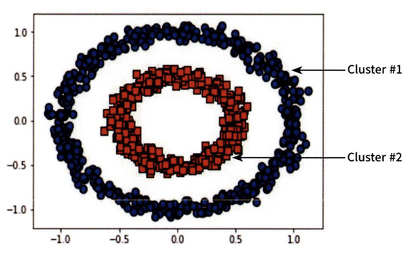

DBSCAN을 구성하는 가장 중요한 두 가지 파라미터는 입실론(eplsilon)으로 표기하는 주변 영역과 이 입실론 주변 영역에 포함되는 최소 데이터의 개수 min points이다.

* 입실론 주변 영역(epsilon): 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역이다.
* 최소 데이터 개수(min points): 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수이다.

입실론 주변 영역 내에 포함되는 최소 데이터 개수를 충족시키는가 아닌가에 따라 데이터 포인트를 다음과 같이 정의한다.

* 핵심 포인트(Core Point): 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우 해당 데이터를 핵심 포인트라고 한다.
* 이웃 포인트(Neighbor Point): 주변 영역 내에 위치한 타 데이터를 이웃 포인트라고 한다.
* 경계 포인트(Border Point): 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터를 경계 포인트라고 한다.
* 잡음 포인트(Noise Point): 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터를 잡음 포인트라고 한다.

1. 다음 그림과 같이 P1에서 P12까지 12개의 데이터 세트에 대해서 DBSCAN 군집화를 적용하면서 주요 개념을 설명하겠다. 특정 입실론 반경 내에 포함될 최소 데이터 세트를 6개로(자기 자신의 데이터를 포함) 가정하겠다.

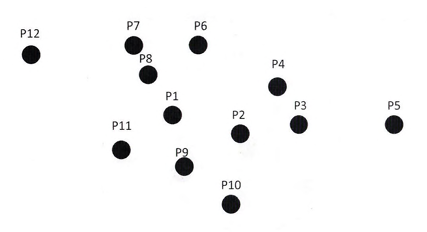

2. P1 데이터를 기준으로 입실론 반경 내에 포함된 데이터가 7개(자신은 P1, 이웃 데이터 P2, P6, P7, P8, P9, P11)로 최소 데이터 5개 이상을 만족하므로 P1 데이터는 핵심 포인트(Core Point)이다.

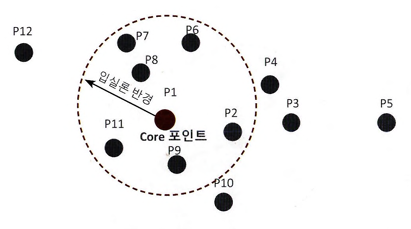

3. 다음으로 P2 데이터 포인트를 살펴보겠다. P2 역시 반경 내에 6개의 데이터(자신은 P2, 이웃 데이터 P1, P3, P4, P9, P10)를 가지고 있으므로 핵심 포인트이다.

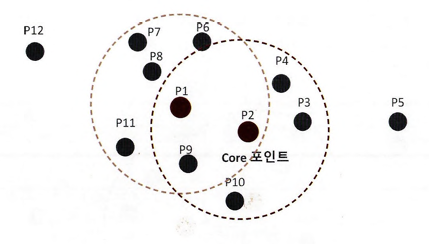

4. 핵심 포인트 P1의 이웃 데이터 포인트 P2 역시 핵심 포인트일 경우 P1에서 P2로 연결해 직접 접근이 가능하다.

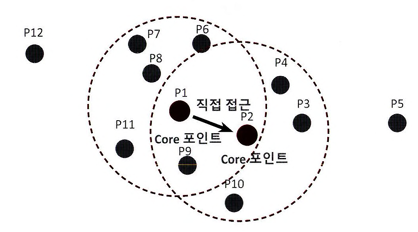

5. 특정 핵심 포인트에서 직접 접근이 가능한 다른 핵심 포인트를 서로 연결하면서 군집화를 구성한다. 이러한 방식으로 점차적으로 군집(Cluster) 영역을 확장해 나가는 것이 DBSCAN 군집화 방식이다.

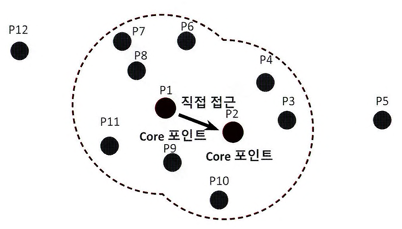

6. P3 데이터의 경우 반경 내에 포함되는 이웃 데이터는 P2, P4로 2개이므로 군집으로 구분할 수 있는 핵심 포인트가 될 수 없다. 하지만 이웃 데이터 중에 핵심 포인트인 P2를 가지고 있다. 이처럼 자신은 핵심 포인트가 아니지만, 이웃 데이터로 핵심 포인트를 가지고 있는 데이터를 경계 포인트(Border Point)라고 하낟. 경계 포인트는 군집의 외곽을 형성한다.

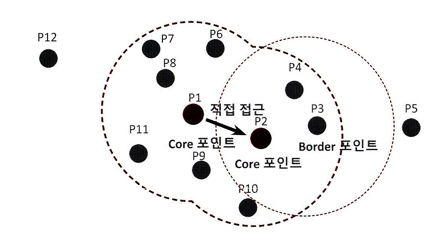

7. 다음 그림의 P5와 같이 반경 내에 최소 데이터를 가지고 있지도 않고, 핵심 포인트 또한 이웃 데이터로 가지고 있지 않는 데이터를 잡음 포인트(Noise Point)라고 한다.

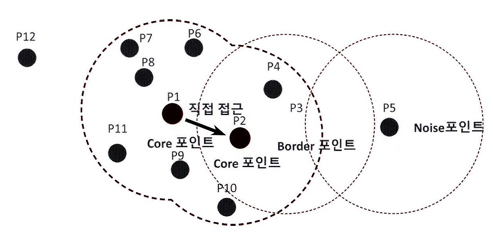

DBSCAN은 이처럼 입실론 주변 영역의 최소 데이터 개수를 포함하는 밀도 기준을 충족시키는 데이터인 핵심 포인트를 연결하면서 군집화를 구성하는 방식이다.

사이킷런은 DBSCAN 클래스를 통해 DBSCAN 알고리즘을 지원한다. DBSCAN 클래스는 다음과 같은 주요한 초기화 파라미터를 가지고 있다.

* eps: 입실론 주변 영역의 반경을 의미한다.
* min_samples: 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함돼야 할 데이터의 최소 개수를 의미한다(자신의 데이터를 포함한다. 위에서 설명한 min points + 1).

## DBSCAN 적용하기 - 붓꽃 데이터 세트

DBSCAN 알고리즘으로 붓꽃 데이터 세트를 군집화해 보겠다. 먼저 새로운 주피터 노트북을 생성하고 붓꽃 데이터 세트를 DataFrame으로 로딩한다. 앞 절의 GMM을 이용한 붓꽃 데이터 세트 군집화의 예제 코드와 동일하므로 코드 작성은 생략하겠다(해당 코드는 앞 절에서 복사해서 사용하면 된다).

다음으로 DBSCAN 클래스를 이용해 붓꽃 데이터 세트를 군집화하겠다. eps=0.6, min_samples=8로 하겠다. 일반적으로 eps 값으로는 1 이하의 값을 설정한다.

In [2]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the iris dataset
iris = load_iris()

# Create a DataFrame for iris data
irisDF = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [3]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: count, dtype: int64


먼저 dbscan_cluster 값을 살펴보겠다. 0과 1 외에 특이하게 -1이 군집 레이블로 있는 것을 알 수 있다. 군집 레이블이 -1인 것은 노이즈에 속하는 군집을 의미한다. 따라서 위 붓꽃 데이터 세트는 DBSCAN에서 0과 1 두 개의 군집으로 군집화됐다. Target 값의 유형이 3가지인데, 군집이 2개가 됐다고 군집화 효율이 떨어진다는 의미는 아니다. DBSCAN은 군집의 개수를 알고리즘에 따라 자동으로 지정하므로 DBSCAN에서 군집의 개수를 지정하는 것은 무의미하다고 할 수 있다. 특히 붓꽃 데이터 세트는 군집을 3개로 하는 것보다는 2개로 하는 것이 군집화의 효율로서 더 좋은 면이 있다.

DBSCAN으로 군집화 데이터 세트를 2차원 평면에서 표현하기 위해 PCA를 이용해 2개의 피처로 압축 변환한 뒤, 앞 예제에서 사용한 visualize_cluster_plot() 함수를 이용해 시각화해 보겠다. visualize_clusterjplot() 함수 인자로 사용하기 위해 irisDF의 'ftrl', 'ftr2' 칼럼에 PCA로 변환된 피처 데이터 세트를 입력하겠다.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

%matplotlib inline

def visualize_cluster_plot(cluster_result=None, dataframe=None, label_name='target', iscenter=True):
    if dataframe is None:
        print("Error: DataFrame is required.")
        return

    unique_labels = np.unique(dataframe[label_name])
    markers = ['o', 's', '^', 'x', '*', 'D', '+', 'v', '<', '>']

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name] == label]
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
                    marker=markers[label % len(markers)])

        if iscenter and cluster_result is not None and hasattr(cluster_result, 'cluster_centers_'):
            # Assuming cluster_result has a .cluster_centers_ attribute
            center_x_y = cluster_result.cluster_centers_[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9,
                        marker=markers[label % len(markers)])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
                        marker='' % label)
    plt.show()

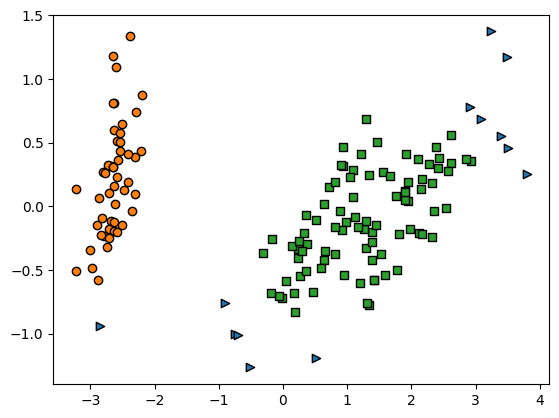

In [5]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_components=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_plot() 함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

별표로 표현된 값은 모두 노이즈이다. PCA로 2차원으로 표현하면 이상치인 노이즈 데이터가 명확히 드러난다. DBSCAN을 적용할 때는 특정 군집 개수로 군집을 강제하지 않는 것이 좋다. DBSCAN 알고리즘에 적절한 eps와 min_samples 파라미터를 통해 최적의 군집을 찾는 게 중요하다. 일반적으로 eps의 값을 크게 하면 반경이 커져 포함하는 데이터가 많아지므로 노이즈 데이터 개수가 작아진다. min_samples를 크게 하면 주어진 반경 내에서 더 많은 데이터를 포함시켜야 하므로 노이즈 데이터 개수가 커지게 된다. 데이터 밀도가 더 커져야 하는데, 매우 촘촘한 데이터 분포가 아닌 경우 노이즈로 인식하기 때문이다.

eps를 기존의 0.6에서 0.8로 증가시키면 노이즈 데이터 수가 줄어든다. 다음 예제 코드로 확인해 보겠다.

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: count, dtype: int64


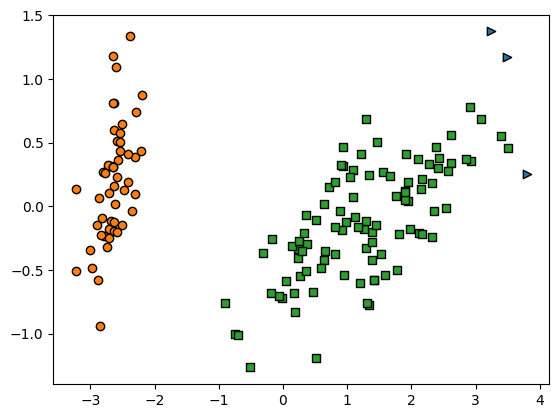

In [6]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

노이즈 군집인 -1이 3개밖에 없다. 기존에 eps가 0.6일 때 노이즈로 분류된 데이터 세트는 eps 반경이 커지면서 Cluster 1 에 소속됐다. 이번에는 eps를 기존 0.6으로 유지하고 min_samples를 16으로 늘려보겠다. 바로 위 예제 코드에서 DBSCAN의 초기화 파라미터 값만 다음과 같이 변경하면 된다.

In [7]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')

노이즈 데이터가 기존보다 많이 증가함을 알 수 있다.

## DBSCAN 적용하기 - make_circles() 데이터 세트
이번에는 복잡한 기하학적 분포를 가지는 데이터 세트에서 DBSCAN과 타 알고리즘을 비교해 보겠다. 먼저 make_circles() 함수를 이용해 내부 원과 외부 원 형태로 돼 있는 2차원 데이터 세트를 만들어 보겠다. make_circles() 함수는 오직 2개의 피처만을 생성하므로 별도의 피처 개수를 지정할 필요가 없다. 파라미터 noise는 노이즈 데이터 세트의 비율이며, factor는 외부 원과 내부 원의 scale 비율이다.

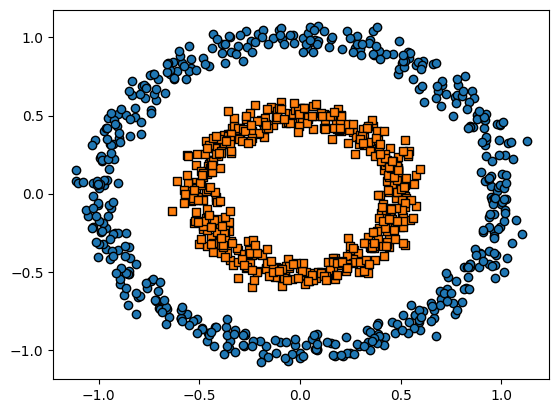

In [8]:
from sklearn.datasets import make_circles

X, y =make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

make_circles()는 내부 원과 외부 원으로 구분되는 데이터 세트를 생성함을 알 수 있다. DBSCAN이 이 데이터 세트를 군집화한 결과를 보기 전에 먼저 K—평균과 GMM은 어떻게 이 데이터 세트를 군집화하는지 확인해 보겠다. 먼저 K-평균으로 make_circles() 데이터 세트를 군집화해보겠다.

/tmp/ipython-input-3189151562.py:26: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',


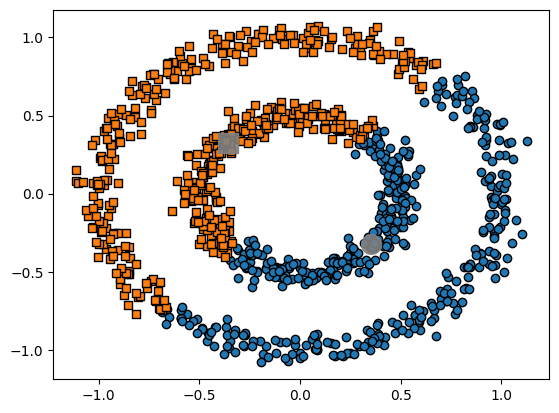

In [10]:
# KMeans로 make_circles() 데이터 세트를 군집화 수행.
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

위, 아래 군집 중심을 기반으로 위와 아래 절반으로 군집화됐다. 거리 기반 군집화로는 위와 같이 데이터가 특정한 형태로 지속해서 이어지는 부분을 찾아내기 어렵다.

다음으로는 GMM을 적용해 보겠다.

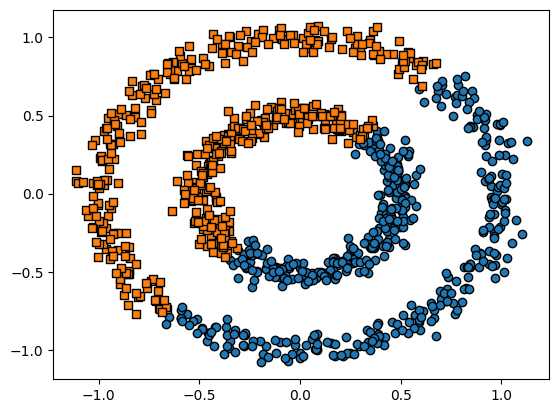

In [11]:
# GMM으로 make_circles() 데이터 세트를 군집화 수행.
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

GMM도 앞 절의 일렬로 늘어선 데이터 세트에서는 효과적으로 군집화 적용이 가능했으나, 내부와 외부의 원형으로 구성된 더 복잡한 형태의 데이터 세트에서는 군집화가 원하는 방향으로 되지 않았다. 이제 DBSCAN으로 군집화를 적용해 보겠다.

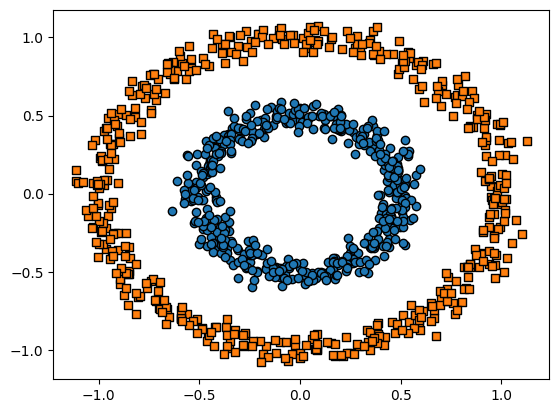

In [12]:
# DBSCAN으로 make_circles() 데이터 세트 군집화 수행.
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels
visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

DBSCAN으로 군집화를 적용해 원하는 방향으로 정확히 군집화가 됐음을 알 수 있다.

## 06. 군집화 실습 - 고객 세그먼테이션

## 고객 세그먼테이션의 정의와 기법

고객 세그먼테이션(Customer Segmentation)은 다양한 기준으로 고객을 분류하는 기법을 지칭한다. 고객 세그먼테이션은 CRM이나 마케팅의 중요 기반 요소이다.

고객을 분류하는 요소는 여러 가지가 있다. 지역/결혼 여부/성별/소득과 같이 개인의 신상 데이터가 이를 위해 사용될 수도 있습니다만, 고객 분류가 사용되는 대부분의 비즈니스가 상품 판매에 중점을 두고 있기 때문에 더 중요한 분류 요소는 어떤 상품을 얼마나 많은 비용을 써서 얼마나 자주 사용하는가에 기반한 정보로 분류하는 것이 보통이다. 기업 입장에서는 얼마나 많은 매출을 발생하느냐가 고객 기준을 정하는 중요한 요소이다.

고객 세그먼테이션의 주요 목표는 타깃 마케팅이다. 타깃 마케팅이란 고객을 여러 특성에 맞게 세분화해서 그 유형에 따라 맞춤형 마케팅이나 서비스를 제공하는 것이다. 평소에 많은 돈을 지불해 서비스를 이용하고 있다면 VIP 전용 상품의 가입을 권유하는 전화나 이메일을 많이 받아봤을 것이다. 새로운 상품이나 서비스를 적극적으로 이용해왔다면 프로모션 상품이 출시될 때마다 권유를 받았을 것이다. 이처럼 기업의 마케팅은고객의 상품구매 이력에서 출발한다.

고객 세그먼테이션은 고객의 어떤 요소를 기반으로 군집화할 것인가를 결정하는 것이 중요한데, 여기서는 기본적인 고객 분석 요소인 RFM 기법을 이용하겠다. RFM 기법은 Recency(R), Frequency(F), Monetary Value(M)의 각 앞글자를 합한 것으로서 각 단어의 의미는 다음과 같다.

* Recency(R): 가장 최근 상품 구입 일에서 오늘까지의 기간
* Frequency(F): 상품 구매 횟수
* Monetary Value(M): 총 구매 금액

이번 절에서는 온라인 판매 데이터를 기반으로 고객 세그먼테이션을 군집화 기반으로 수행해 보겠다.

## 데이터 세트 로딩과 데이터 클렌징

새로운 주피터 노트북을 생성하고 해당 엑셀 파일을 주피터 노트북이 생성한 디렉터리로 저장한다. 엑셀 파일을 판다스의 read_excel() 함수를 이용해 DataFrame으로 로드해 보겠다.

In [14]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df = pd.read_excel(io='/content/Online Retail.xlsx')
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


이 데이터 세트는 제품 주문 데이터 세트이다. Invoice(주문번호) + StockCode(제품코드)를 기반으로 주문량, 주문 일자, 제품 단가, 주문 고객 번호, 주문 고객 국가 등의 칼럼으로 구성돼 있다. 데이터 세트의 각 칼럼은 다음과 같다.

* InvoiceNo: 주문번호 'C'로 시작하는 것은 취소 주문이다.
* StockCode: 제품 코드(Item Code)
* Description: 제품 설명
* Quantity: 주문 제품 건수
* InvoiceDate: 주문 일자
* UnitPrice: 제품 단가
* CustomerlD: 고객 번호
* Country: 국가명(주문고객의국적)

데이터 세트의 전체 건수, 칼럼 타입, Null 개수를 확인해 보겠다.

In [15]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


전체 데이터는 541,909개이다. 하지만 CustomerlD의 Null 값이 너무 많다. CustomerlD가 Not Null인 데이터 건수는 406,829개로 무려 13만5천 건의 데이터가 Null이다. 그 외에 다른 칼럼의 경우도 오류 데이터가 존재한다. 따라서 이 데이터 세트는 먼저 사전 정제 작업이 필요하다.

* Null 데이터 제거: 특히 CustomerlD가 Null인 데이터가 많다. 고객 세그먼테이션을 수행하므로 고객 식별 번호가 없는 데이터는 필요가 없기에 삭제한다.
* 오류 데이터 삭제 대표적인 오류 데이터는 Quantity 또는 UnitPrice가 0보다 작은 경우이다. 사실 Quantity가 0보다 작은 경우는 오류 데이터라기보다는 반환을 뜻하는 값이다. 이 경우 InvoiceNo의 앞자리는 'C'로 돼 있다. 분석의 효율성을 위해서 이 데이터는 모두 삭제하겠다.

불린 인덱싱을 적용해 Quantity>0, UnitPrice>0이고 CustomerlD이 Not Null인 값만 다시 필터링 하겠다.

In [16]:
retail_df = retail_df[retail_df['Quantity']>0]
retail_df = retail_df[retail_df['UnitPrice']>0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


전체 데이터가 541,909에서 397,884로 줄었다. 이제 Null 값은 칼럼에 존재하지 않는다. 한 가지 사항만 더 정리하고 간략하게 데이터 사전 정제를 마치겠다. Country 칼럼은 주문 고객 국가이다. 주요 주문 고객은 영국인데, 이 외에도 EU의 여러 나라와 영연방 국가들이 포함돼 있다.

In [17]:
retail_df['Country'].value_counts()[:5]

,count
Country,
United Kingdom,354321
Germany,9040
France,8341
EIRE,7236
Spain,2484


영국이 대다수를 차지하므로 다른 국가의 데이터는 모두 제외하겠다.

In [18]:
retail_df = retail_df[retail_df['Country'] == 'United Kingdom']
print(retail_df.shape)

(354321, 8)


최종 데이터는 354,321 건으로 줄었다.

## RFM 기반 데이터 가공
이제 사전 정제된 데이터 기반으로 고객 세그먼테이션 군집화를 RFM 기반으로 수행하겠다. 이를 위해 필요한 데이터를 가공해 보겠다. 먼저 'UnitPrice'와 'Quantity'를 곱해서 주문 금액 데이터를 만들겠다. 그리고 CustomerNo도 더 편리한 식별성을 위해 float 형을 int 형으로 변경하겠다.

In [19]:
retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

해당 온라인 판매 데이터 세트는 주문 횟수와 주문 금액이 압도적으로 특정 고객에게 많은 특성을 가지고 있다. 개인 고객의 주문과 소매점의 주문이 함께 포함돼 있기 때문이다. Top-5 주문 건수와 주문 금액을 가진 고객 데이터를 추출해 보겠다.

In [20]:
print(retail_df['CustomerID'].value_counts().head(5))
print(retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5])

CustomerID
17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: count, dtype: int64
CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


위의 결과에서 볼 수 있듯이 몇몇 특정 고객이 많은 주문 건수와 주문 금액을 가지고 있다. 주어진 온라인 판매 데이터 세트는 전형적인 판매 데이터 세트와 같이 주문번호(invoiceNo) + 상품코드(StockCode) 레벨의 식별자로 돼 있다. InvoiceNo + StockCode로 Group by를 수행하면 거의 1에 가깝게 유일한 식별자 레벨이 됨을 알 수 있다.

In [21]:
retail_df.groupby(['InvoiceNo', 'StockCode'])['InvoiceNo'].count().mean()

np.float64(1.028702077315023)

그런데 지금 수행하려는 RFM 기반의 고객 세그먼테이션은 고객 레벨로 주문 기간, 주문 횟수, 주문 금액 데이터를 기반으로 해 세그먼테이션을 수행하는 것이다. 이에 주문번호+상품코드 기준의 데이터를 고객 기준의 Recency, Frequency, Monetary value 데이터로 변경하겠다. 이를 위해서는 주문번호 기준의 데이터를 개별 고객 기준의 데이터로 Group by를 해야 한다.

주문번호 기준의 retail_df DataFrame에 groupby('CustomerlD')를 적용해 CustomerlD 기준으로 DataFrame을 새롭게 생성하겠다. DataFrame의 groupby()만 사용해서는 여러 개의 칼럼에 서로 다른 aggregation 연산, 예를 들어 count()나 max()를 한 번에 수행하기 어렵다. 이를 해결하기 위해서 DataFrame에 groupby를 호출해 반환된 DataFrameGroupby 객체에 agg()를 이용하겠다. agg()에 인자로 대상 칼럼들과 aggregation 함수명들을 딕셔너리 형태로 입력하면 칼럼 여러 개의 서로 다른 aggregation 연산을 쉽게 수행할 수 있다. Frequency는 고객별 주문 건수이므로 'CustomerlD'로 groupby()해서 'InvoiceNo'의 count() aggregation으로 구한다. Monetary value는 고객별 주문 금액이므로 'CustomerlD'로 groupby()해서 'sale_amount'의 sum() aggregation으로 구한다. Recency의 경우는 두 번의 가공 작업을 수행하겠다. 'CustomerlD'로 groupby()해서 'InvoiceDate' 칼럼의 max()로 고객별 가장 최근 주문 일자를 먼저 구한 뒤 추후에 가공 작업을 별도로 수행하겠다.

In [22]:
# DataFrame의 groupby()의 multiple 연산을 위해 agg() 이용
# Recenvy는 InvoiceDate 칼럼의 max()에서 데이터 가공
# Frequency는 InvoiceNo 칼럼의 count(), Monetary value는 sale_anount 칼럼의 sum()
aggregations = {
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'sale_amount': 'sum'
}
cust_df = retail_df.groupby('CustomerID').agg(aggregations)
# groupby된 결과 칼럼 값을 Recency, Frequency, Monetary로 변경
cust_df = cust_df.rename(columns = {'InvoiceDate':'Recency',
                                    'InvoiceNo':'Frequency',
                                    'sale_amount':'Monetary'
                                    }
                         )
cust_df = cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


Recency 칼럼은 개별 고객당 가장 최근의 주문인데, 데이터 값의 특성으로 인해 아직 데이터 가공이 추가로 필요하다. Recency는 고객이 가장 최근에 주문한 날짜를 기반으로 하는데, 오늘 날짜를 기준으로 가장 최근 주문 일자를 뺀 날짜이다. 여기서 주의할 점은 오늘 날짜를 현재 날짜로 해서는 안된다는 것이다. 온라인 판매 데이터가 2010년 12월 1일에서 2011년 12월 9일까지의 데이터이므로 오늘 날짜는 2011년 12월 9일에서 하루 더한 2011년 12월 10일로 하겠다. 2011년 12월 10일을 현재 날짜로 간주하고 가장 최근의 주문 일자를 뺀 데이터에서 일자 데이터(days)만 추출해 생성하겠다.

In [23]:
import datetime as dt

cust_df['Recency'] = dt.datetime(2011, 12, 10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
print('cust_df 로우와 칼럼 건수는', cust_df.shape)
cust_df.head(3)

cust_df 로우와 칼럼 건수는 (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


이제 고객별로 RFM 분석에 필요한 Recency, Frequency, Monetary 칼럼을 모두 생성했다. 다음으로는 생성된 고객 RFM 데이터 세트의 특성을 개괄적으로 알아보고 RFM 기반에서 고객 세그먼테이션을 수행하겠다.

## RFM 기반 고객 세그먼테이션

앞에서 잠깐 언급했지만, 온라인 판매 데이터 세트는 소매업체의 대규모 주문을 포함하고 있다. 이들은 주문 횟수와 주문 금액에서 개인 고객 주문과 매우 큰 차이를 나타내고 있으며 이로 인해 매우 왜곡된 데이터 분포도를 가지게 되어 군집화가 한쪽 군집에만 집중되는 현상이 발생하게 된다. 먼저 온라인 판매 데이터 세트의 칼럼별 히스토그램을 확인하고, 이처럼 왜곡된 데이터 분포도에서 군집화를 수행할 때 어떤 현상이 발생하는지 알아보겠다. 다음 예제 코드는 'Recency', 'Frequency', 'Monetary' 칼럼 값 분포 히스토그램을 나타낸다. 맷플롯립의 hist()를 이용해 각 칼럼의 값 분포도를 알아보겠다.

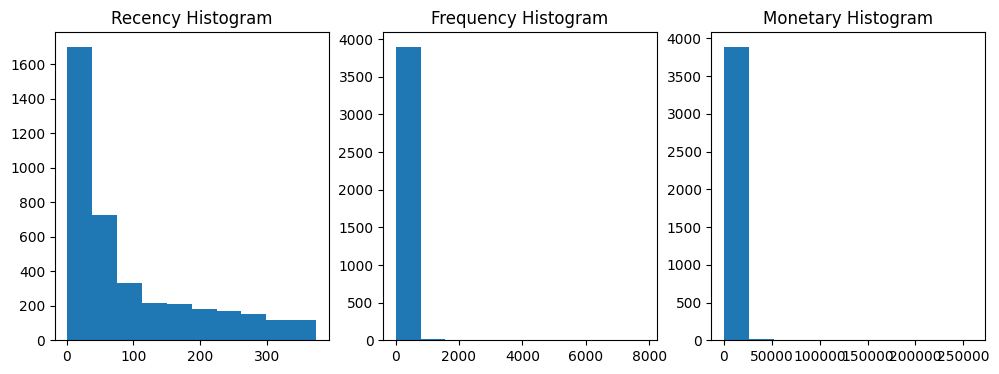

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12, 4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])
plt.show()

Recency, Frequency, Monetary 모두 왜곡된 데이터 값 분포도를 가지고 있으며, 특히 Frequency, Monetary의 경우 특정 범위에 값이 몰려 있어서 왜곡 정도가 매우 심함을 알 수 있다. 각 칼럼의 데이터 값 백분위로 대략적으로 어떻게 값이 분포돼 있는지 확인하겠다.

In [25]:
cust_df[['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


Recency는 평균이 92.7이지만, 50%(중위값 2/4 분위)인 51보다 크게 높다. 그리고 max 값은 374로 75%(3/4 분위)인 143보다 훨씬 커서 왜곡 정도가 높음을 알 수 있다. Frequency와 Monetary의 경우는 왜곡 정도가 더 심해서 Frequency의 평균이 90.3인데, 75%인 99.25에 가깝다. 이는 max 값 7847을 포함한 상위 몇 개의 큰 값으로 인한 것이다. Monetary 역시 마찬가지이다. 평균은 1864.3으로 75%인 1576.5보다 매우 크다. 이는 max 값 259657.3을 포함한 상위 몇 개의 큰 값으로 인해 발생한 현상이다.

왜곡 정도가 매우 높은 데이터 세트에 K-평균 군집을 적용하면 중심의 개수를 증가시키더라도 변별력이 떨어지는 군집화가 수행된다. 먼저 데이터 세트를 StandardScaler로 평균과 표준편차를 재조정한 뒤에 K-평균을 수행해 보겠다.

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency', 'Frequency', 'Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어는 : 0.576


군집을 3개로 구성할 경우 전체 군집의 평균 실루엣 계수인 실루엣 스코어는 0.592로 안정적인 수치가 나왔다. 하지만 각 군집별 실루엣 계수 값은 어떨까요? 2절 군집평가 예제에서 사용한 visualize_silhouette() 함수와 군집 개수별로 군집화 구성을 시각화하는 visualize_kmeans_plot_multi() 함수(해당 함수는 부록에서 제공되는 소스 코드에 있다)를 새롭게 생성하여 군집 개수를 2〜5개까지 변화시키면서(함수 인자로 [2,3,4,5]를 입력한다) 개별 군집의 실루엣 계수 값과 데이터 구성을 함께 알아보겠다.

In [27]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

def visualize_silhouette(cluster_lists, X_features):
    # Visualize Silhouette for each cluster_lists
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4 * n_cols, 4), nrows=1, ncols=n_cols)

    for ind, n_cluster in enumerate(cluster_lists):
        kmeans = KMeans(n_clusters=n_cluster, max_iter=500, random_state=0, n_init='auto')
        cluster_labels = kmeans.fit_predict(X_features)

        silhouette_avg = silhouette_score(X_features, cluster_labels)
        sample_silhouette_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : ' + str(n_cluster) + '\n' \
                           'Silhouette Score :' + str(round(silhouette_avg, 3)))
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        for i in range(n_cluster):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, \
                                   facecolor=color, edgecolor=color, alpha=0.7)

            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.tight_layout()
    plt.show()

def visualize_kmeans_plot_multi(cluster_lists, X_features, iscenter=False):
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4 * n_cols, 4), nrows=1, ncols=n_cols)

    pca = PCA(n_components=2, random_state=0)
    pca_transformed = pca.fit_transform(X_features)

    dataframe = pd.DataFrame(data=pca_transformed, columns=['ftr1', 'ftr2'])

    markers = ['o', 's', '^', 'x', '*', 'D', '+', 'v', '<', '>']

    for ind, n_cluster in enumerate(cluster_lists):
        kmeans = KMeans(n_clusters=n_cluster, max_iter=500, random_state=0, n_init='auto')
        cluster_labels = kmeans.fit_predict(X_features)
        dataframe['cluster'] = cluster_labels

        unique_labels = np.unique(dataframe['cluster'])

        for label in unique_labels:
            label_cluster = dataframe[dataframe['cluster'] == label]
            axs[ind].scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
                             marker=markers[label % len(markers)])

        if iscenter and hasattr(kmeans, 'cluster_centers_'):
            center_x_y = pca.transform(kmeans.cluster_centers_)
            for label, center in enumerate(center_x_y):
                axs[ind].scatter(x=center[0], y=center[1], s=200, color='gray', alpha=0.9,
                                 marker=markers[label % len(markers)])
                axs[ind].scatter(x=center[0], y=center[1], s=70, color='k', edgecolor='k',
                                 marker='' % label)

        axs[ind].set_title('Number of Cluster : ' + str(n_cluster))
        axs[ind].set_xlabel('ftr1')
        axs[ind].set_ylabel('ftr2')

    plt.tight_layout()
    plt.show()

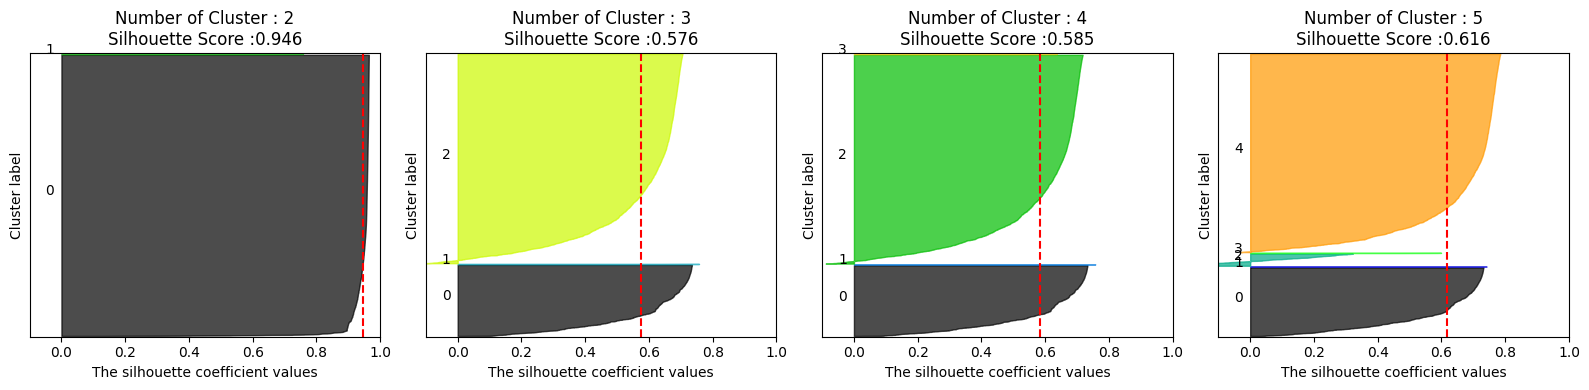

/tmp/ipython-input-3424543561.py:70: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
/tmp/ipython-input-3424543561.py:70: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',


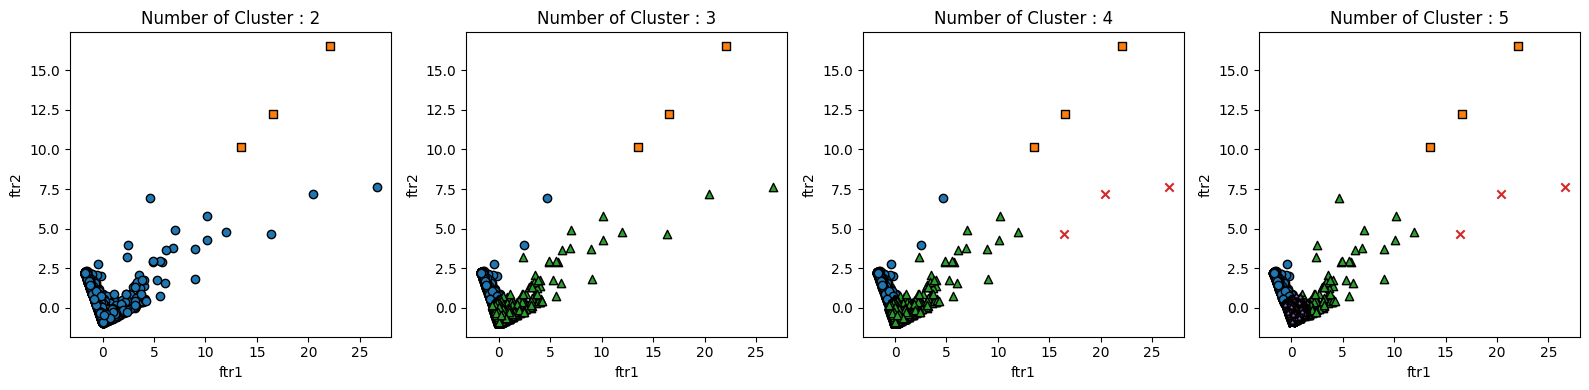

In [28]:
visualize_silhouette([2,3,4,5], X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5], X_features_scaled)

출력 결과를 더 자세히 살펴보겠다. 군집이 2개일 경우 0번 군집과 1번 군집이 너무 개괄적으로 군집화됐다. 군집 수를 증가시키면 개선이 가능할 것으로 예상됐는데, 실제 결과는 너무나 달랐다. 군집이 3개 이상일 때부터는 데이터 세트의 개수가 너무 작은 군집이 만들어진다. 이 군집에 속한 데이터는 개수가 작을뿐더러 실루엣 계수 역시 상대적으로 매우 작다. 또한 군집 내부에서도 데이터가 광범위하게 퍼져 있다. 군집이 3개 일 때는 0번 군집의 데이터 건수가 매우 작고, 4개일 때는 2번, 3번 군집이, 5개일 때는 2, 3, 4번 군집에 속한 데이터 세트의 개수가 너무 적고 광범위하게 퍼져 있다. 이 소수의 데이터 세트는 바로 앞에서 왜곡된 데이터 값인 특정 소매점의 대량 주문 구매 데이터이다. 이 데이터 세트의 경우 데이터 값이 거리 기반으로 광범위하게 퍼져 있어서 군집 수를 계속 늘려봐야 이 군집만 지속적으로 분리하게 되기에 의미 없는 군집화 결과로 이어지게 된다.

물론 이러한 특이한 데이터 세트를 분리하고 도출하는 것이 군집화의 목표이기도 하다. 하지만 이 정도로 크게 왜곡된 데이터 세트의 도출은 굳이 군집화를 이용하지 않고도 간단한 데이터 분석만으로도 충분히 가능한다. 더구나 업무 로직을 알고 있는 분석가라면 이미 이 정도의 세그먼테이션 결과는 미리 알고 있었을 것이다. 이처럼 지나치게 왜곡된 데이터 세트는 K-평균과 같은 거리 기반 군집화 알고리즘에서 지나치게 일반적인 군집화 결과를 도출하게 된다.

비지도학습 알고리즘의 하나인 군집화의 기능적 의미는 숨어 있는 새로운 집단을 발견하는 것이다. 새로운 군집 내의 데이터 값을 분석하고 이해함으로써 이 집단에 새로운 의미를 부여할 수 있다. 이를 통해 전체 데이터를 다른 각도로 바라볼 수 있게 만들어 준다.

데이터 세트의 왜곡 정도를 낮추기 위해 가장 자주 사용되는 방법은 데이터 값에 로그(Log)를 적용하는 로그 변환이다. 온라인 판매 데이터 세트의 왜곡 정도를 낮추기 위해서 전체 데이터를 로그 변환한 뒤에 K-평균 알고리즘을 적용하고 결과를 비교해 보겠다.

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequency, Monetary 칼럼에 np.log1p()로 Log Transformation
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features = cust_df[['Recency_log', 'Frequency_log', 'Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어는 : 0.303


실루엣 스코어는 로그 변환하기 전보다 떨어진다. 하지만 실루엣 스코어의 절대치가 중요한 것이 아님을 앞의 예제에서 잘 알 수 있다. 어떻게 개별 군집이 더 균일하게 나뉠 수 있는지가 더 중요하다. 로그 변환한 데이터 세트를 기반으로 실루엣 계수와 군집화 구성을 시각화해 보겠다.

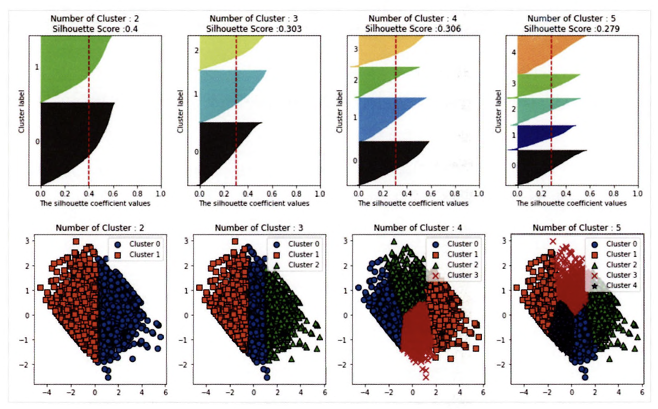

실루엣 스코어는 로그 변환하기 전보다 떨어지지만 앞의 경우보다 더 균일하게 군집화가 구성됐음을 위 그림을 통해 알 수 있다. 이처럼 왜곡된 데이터 세트에 대해서는 로그 변환으로 데이터를 일차 변환한 후에 군집화를 수행하면 더 나은 결과를 도출할 수 있다.

## 07. 정리

이번 장에서는 다양한 머신러닝 기반의 군집화 기법을 소개했다. 각 군집화 기법은 나름의 장/단점을 가지고 있으며, 군집화하려는 데이터의 특성에 맞게 선택해야 한다. K-평균의 경우 거리 기반으로 군집 중심점을 이동시키면서 군집화를 수행한다. 매우 쉽고 직관적인 알고리즘으로 많은 군집화 애플리케이션에서 애용되지만, 복잡한 구조를 가지는 데이터 세트에 적용하기에는 한계가 있으며, 군집의 개수를 최적화하기가 어렵다. K-평균은 군집이 잘 되었는지의 평가를 위해 실루엣 계수를 이용한다.

평균 이동(Mean Shift)은 K-평균과 유사하지만 거리 중심이 아니라 데이터가 모여 있는 밀도가 가장 높은 쪽으로 군집 중심점을 이동하면서 군집화를 수행한다. 일반 업무 기반의 정형 데이터 세트보다는 컴퓨터 비전 영역에서 이미지나 영상 데이터에서 특정 개체를 구분하거나 움직임을 추적하는 데 뛰어난 역할을 수행하는 알고리즘이다.

GMM(Gaussian Mixture Model) 군집화는 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포(Gaussian Distribution)를 모델을 섞어서 생성된 모델로 가정해 수행하는 방식이다. 전체 데이터 세트에서 서로 다른 정규 분포 형태를 추출해 이렇게 다른 정규 분포를 가진 데이터 세트를 각각 군집화하는 것이다. GMM의 경우는 K-평균보다 유연하게 다양한 데이터 세트에 잘 적용될 수 있다는 장점과 군집화를 위한 수행 시간이 오래 걸린다는 단점이 있었다.

DBSCAN(Density Based Spatial Clustering of Applications with Noise)은 밀도 기반 군집화의 대표적인 알고리즘이다. DBSCAN은 입실론 주변 영역 내에 포함되는 최소 데이터 개수의 충족 여부에 따라 데이터 포인트를 핵심 포인트, 이웃 포인트, 경계 포인트, 잡음 포인트로 구분하고 특정 핵심 포인트에서 직접 접근이 가능한 다른 핵심 포인트를 서로 연결하면서 군집화를 구성하는 방식이다. DBSCAN은 간단하고 직관적인 알고리즘으로 돼 있음에도 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화가 가능하다.